In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

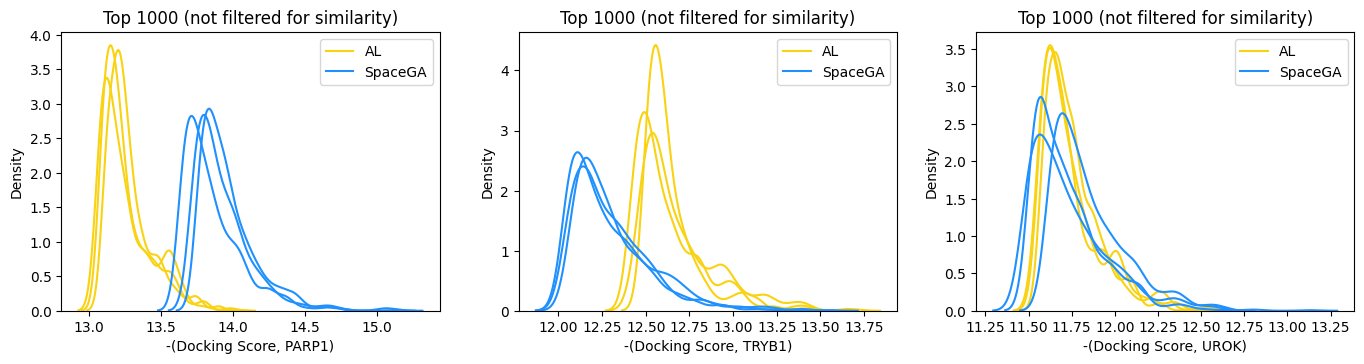

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4), width_ratios=[4, 4, 4])
names = {"spacega": "SpaceGA",
         "al": "AL"
        }
palette = ["#f9d212", "#1f90fe"]

for k, name in enumerate(["al", "spacega"]):
    for i, protein in enumerate(["PARP1", "TRYB1", "UROK"]):
        ax = axes[i]
        for rep in range(1,4):
            subset = pd.concat([pd.read_parquet(f"../{name}/{protein}/{rep}/gen_{gen}.parquet") for gen in range(1, 1+(k+1)*10)])
            subset = subset.sort_values("scores", ascending=False).drop_duplicates("name").head(1000)
            if rep == 1:
                line = sns.kdeplot(subset.scores, ax=ax, c=palette[k], label=names[name])
            else:
                line = sns.kdeplot(subset.scores, ax=ax, c=palette[k])
        ax.set_xlabel(f"-(Docking Score, {protein})")
        ax.set_title("Top 1000 (not filtered for similarity)")
        ax.legend()

fig.tight_layout(pad=2.0)
plt.savefig("../figures/no_filter.pdf")

In [36]:
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem

In [40]:
def mol2fp(m):
    return AllChem.GetMorganFingerprintAsBitVect(m, radius=2, nBits=1024)

In [53]:
name=""
for i, protein in enumerate(["PARP1", "TRYB1", "UROK"]):
    for rep in range(1,4):
        pd.read_parquet(f"../spacega/{protein}/{rep}/final.parquet").to_parquet(f"~/{protein}_{rep}.parquet")
        name += f" {protein}_{rep}.parquet"
print(name)

 PARP1_1.parquet PARP1_2.parquet PARP1_3.parquet TRYB1_1.parquet TRYB1_2.parquet TRYB1_3.parquet UROK_1.parquet UROK_2.parquet UROK_3.parquet


In [57]:
df.head(4).to_parquet(f"~/test.parquet")

In [35]:
combined = []
for i, protein in enumerate(["PARP1", "TRYB1", "UROK"]):
    for rep in range(1,4):
        df = pd.read_parquet(f"../al/{protein}/{rep}/final.parquet")
        df["Rep."] = rep
        df["Protein"] = protein
        combined.append(df)
combined = pd.concat(combined)
combined.to_parquet("~/real.parquet")
combined[["smi"]].to_csv("~/real.smi", header=None, index=None)